In [1]:
import tensorflow as tf 
from tensorflow.python.platform import gfile

In [2]:
graph_def='D:/keypoints/saved_model.pb'

In [3]:
inp_array=['Input']
out_array=["output"]


In [4]:
interpreter = tf.lite.Interpreter(model_path="D:/eye-blink-modified/keypoints-1.tflite")
interpreter.allocate_tensors()

In [5]:
 # Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'images', 'index': 411, 'shape': array([  1, 160, 160,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [6]:
output_details = interpreter.get_output_details()
print(output_details)


[{'name': 'Identity', 'index': 1, 'shape': array([1, 4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'Identity_1', 'index': 2, 'shape': array([1, 3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'Identity_2', 'index': 3, 'shape': array([  1, 136]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("E:/eye_blink_detection/blink_image/blink_3.jpg")
#img=cv2.imread("D:/img-3.jpg")

#img=cv2.imread("E:/eye_blink_detection/eyelids_open_image/nn.jpg")
print(img.shape)
img=cv2.resize(img,(160,160))
#print(img.shape)
img1=img.copy()
#img=img/255
img=[img]
img = np.concatenate([arr[np.newaxis] for arr in img])
print(img.shape)
 
img=img.astype("int32")
#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(img, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)


interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[2]['index'])
print(output_data)
landmarks=output_data
#plt.imshow(img1)

(303, 235, 3)
(1, 160, 160, 3)
[[0.13380472 0.46619695 0.14264348 0.53637636 0.15763327 0.60470986
  0.18343571 0.6719446  0.22436151 0.7342398  0.28237993 0.7862751
  0.348531   0.8290957  0.41719958 0.8654752  0.49659565 0.8780991
  0.5770143  0.86468184 0.6446068  0.82686865 0.70786405 0.78433627
  0.7599591  0.7331498  0.79555815 0.6730919  0.8142199  0.6050401
  0.82105744 0.5331059  0.8197479  0.46190852 0.21536952 0.40167165
  0.25429416 0.38276008 0.30587673 0.378535   0.3592028  0.38625297
  0.40757573 0.40128    0.54156876 0.40092644 0.5920404  0.38190866
  0.6465289  0.37284023 0.6992611  0.37601507 0.7422367  0.3944496
  0.480397   0.48042986 0.48306215 0.5311796  0.4859259  0.58194685
  0.4884602  0.63259107 0.41538683 0.66271544 0.44908842 0.6720246
  0.4880747  0.67983997 0.52600145 0.67140627 0.5612277  0.66054624
  0.266052   0.48901674 0.30462956 0.4891467  0.34454098 0.4880517
  0.38445824 0.49172416 0.34488928 0.49804196 0.30429184 0.49897513
  0.5791077  0.49267077

72 73


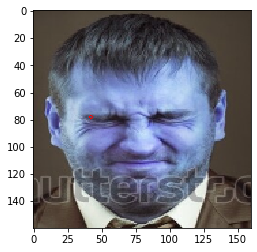

In [8]:
#check landmark
index = 36
x_index = (index)*2
y_index = (index)*2+1
print(x_index,y_index)
x = int(output_data[0][x_index]*img1.shape[1])
#print(x)
y = int(output_data[0][y_index]*img1.shape[0])
#print(x,y)
color = (255,0, 0)
img1_annoted = cv2.circle(img1.copy(),(x,y), 1, color, 1)
plt.imshow(img1_annoted)

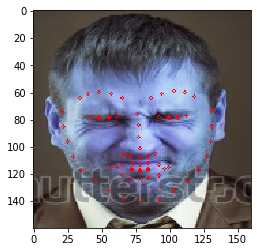

In [9]:
img1_annoted = img1.copy()
for index in range(68):
    x_index = (index)*2
    y_index = ((index)*2)+1
    #print(x_index,y_index)
    x = int(output_data[0][x_index]*img1.shape[1])
    y = int(output_data[0][y_index]*img1.shape[0])
    color = (255,0, 0)
    #print(x,y)
    img1_annoted = cv2.circle(img1_annoted,(x,y), 1, color, 1)
plt.imshow(img1_annoted)

In [10]:
#.............................eye blink check.....................................

In [11]:


from math import hypot

def midpoint(p1 ,p2,p3,p4):
    return int((p1 + p3)/2), int((p2 + p4)/2)


def get_eye(eye_points,landmarks,img1):
    
    #..........................for both_eye........................
    x_index = (eye_points[0])*2
    y_index = (eye_points[0])*2+1
    
    left_point= ((landmarks[0][x_index]*img1.shape[1]).astype(int),
                (landmarks[0][y_index]*img1.shape[0]).astype(int))
    right_point=((landmarks[0][(eye_points[3])*2]*img1.shape[1]).astype(int),
                (landmarks[0][(eye_points[3])*2+1]*img1.shape[0]).astype(int))
    
    center_top = midpoint((landmarks[0][(eye_points[1])*2]*img1.shape[1]).astype(int),
                          (landmarks[0][(eye_points[1])*2+1]*img1.shape[0]).astype(int),
                          (landmarks[0][(eye_points[2])*2]*img1.shape[1]).astype(int),
                          (landmarks[0][(eye_points[2])*2+1]*img1.shape[0]).astype(int),

                                     )
    center_bottom = midpoint((landmarks[0][(eye_points[5])*2]*img1.shape[1]).astype(int),
                             (landmarks[0][(eye_points[5])*2+1]*img1.shape[0]).astype(int),
                             (landmarks[0][(eye_points[4])*2]*img1.shape[1]).astype(int),
                              (landmarks[0][(eye_points[4])*2+1]*img1.shape[0]).astype(int),
                            )
    print(left_point,right_point,center_top,center_bottom)
    hor_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))

    ratio = hor_line_lenght / ver_line_lenght
    #print(ratio)
    
    return ratio


In [12]:

left_eye = get_eye([36,37,38, 39, 40, 41],landmarks,img1)
right_eye=get_eye([42, 43, 44, 45, 46,47], landmarks,img1)
#print(left_point_1,left_point_2)
#print(right_point_1,right_point_2)

(42, 78) (61, 78) (51, 78) (51, 79)
(92, 78) (112, 77) (102, 77) (102, 79)


In [13]:
blinking_ratio = (left_eye + right_eye) / 2
print(blinking_ratio)

14.506246098625198


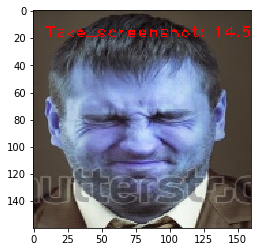

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
if blinking_ratio>5.50:
    cv2.putText(img1,"Take_screenshot: {}".format(blinking_ratio), (8, 20), font,0.8, (255, 0, 0),1)
elif blinking_ratio<5.50:
    cv2.putText(img1, "Eyelids_open: {}".format(blinking_ratio), (8, 20), font,0.8, (255, 0, 0),1)
plt.imshow(img1)   